# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

- **Expected Accuracy Score on the given test set**: >89%
- **Expected Accuracy Score on the HIDDEN test set**: as high as possible. Top 5 will be picked to present

**Submission:** 
- Share your notebook to instructors (quan.tran@coderschool.vn), and prepare your presentation on the next Monday afternoon. 

- The submission.csv file. You can put them inside the submissions folder.
The name of the file should be like this: \<your_name\>_submission.csv. For example: quantran_submission.csv


**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Use Sklearn Pipeline 
- Confusion Matrix
- Plot the images that the model predicts incorrectly
- Use confusion matrix and images plotted incorrectly to do error analysis

## Sample code to get fashion MNIST data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

sns.set_style("whitegrid")
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('val data:', X_val.shape, y_val.shape)

4431872/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
val data: (10000, 28, 28) (10000,)


# Sample code to display images

In [ ]:
def plot_images_3d(images, labels=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    if not labels is None:
      ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
def plot_images_2d(data, height=28, width=28):
    fig, axes = plt.subplots(4, 10, figsize=(20, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(height, width), cmap=plt.cm.gray_r)

In [ ]:
def get_samples(n_samples, X, y=None):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
  if not y is None:
    return X[samples_index], y[samples_index]
  return X[samples_index]

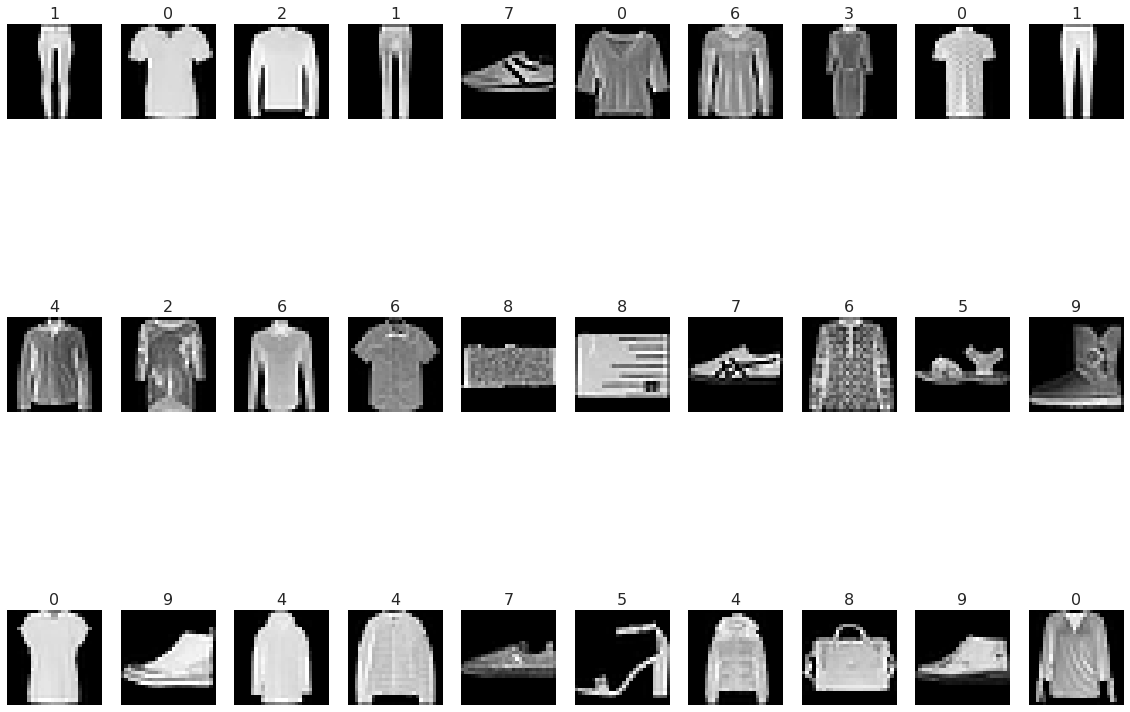

In [ ]:
images, labels = get_samples(30, X_train, y_train)
plot_images_3d(images, labels)

# Your Code 

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

In [ ]:
print('Trainingm data:', X_train.shape, y_train.shape)
print('Val data:', X_val.shape, y_val.shape)

Trainingm data: (60000, 28, 28) (60000,)
Val data: (10000, 28, 28) (10000,)


In [ ]:
# Normalization:
X_train = X_train/255
X_val = X_val/255

print(X_train.dtype, X_train.min(), X_train.max())
print(X_val.dtype,  X_val.min(),  X_val.max())

float64 0.0 1.0
float64 0.0 1.0


In [ ]:
# Reshape into 2D, keeping the first dimension constant

X_train = X_train.reshape(X_train.shape[0],-1)
X_val = X_val.reshape(X_val.shape[0],-1)

# Double check
print('Training data shape', X_train.shape)
print('val data shape', X_val.shape)

Training data shape (60000, 784)
val data shape (10000, 784)


In [ ]:
# Get a smaller sample size for faster training
n_samples = 6000
n_val_samples = 1200

X_train_sample, y_train_sample = get_samples(n_samples, X_train, y_train)
X_val_sample , y_val_sample  = get_samples(n_val_samples, X_val, y_val)

print(X_train_sample.shape, X_val_sample.shape)

(6000, 784) (1200, 784)


**PCA**

PCA is applied to the training data in order to:

- Reduce the dimensionality of the dataset to reduce problems due to Curse of Dimensionality

- Faster training

- May reduce Overfitting

- Filter noisy data

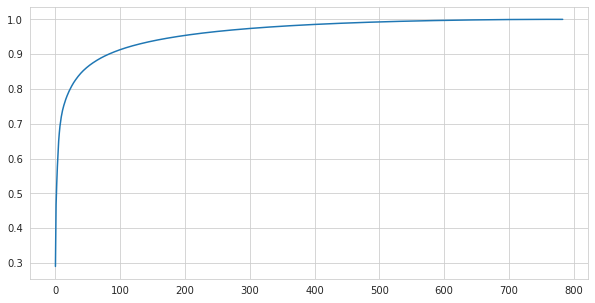

In [ ]:
# Choosing # of components
pca_full = PCA() # keep all princial components (default)
pca_full.fit(X_train)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
plt.plot(pca_full.explained_variance_ratio_.cumsum())

plt.show()
# this plot indicates that to retain around 90% variance explained in the data after feature reduction, we need around 100 components

original shape:    (60000, 784)
transformed shape: (6000, 179)
Number of components retained: 179


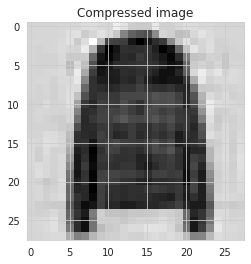

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

pca.fit(X_train_sample)

X_train_sample_pca = pca.transform(X_train_sample)
X_val_sample_pca = pca.transform(X_val_sample)

print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_sample_pca.shape)
print('Number of components retained:', pca.n_components_)

X_train_inverse = pca.inverse_transform(X_train_sample_pca)
X_val_inverse = pca.inverse_transform(X_val_sample_pca)

plt.title('Compressed image')
plt.imshow(X_train_inverse[3].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

In [ ]:
#PCA on whole data
pca = PCA(n_components=0.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)
print('Number of components retained:', pca.n_components_)

X_train_inverse = pca.inverse_transform(X_train_pca)
X_val_inverse = pca.inverse_transform(X_val_pca)


original shape:    (60000, 784)
transformed shape: (60000, 187)
Number of components retained: 187


#Train Model

##**KNN**

###GridSearch

In [ ]:
#Search KNN
knn = KNeighborsClassifier()

params = {'n_neighbors': np.arange(3,15,2)}

knn_gs = GridSearchCV(knn, params, cv=KFold(n_splits=5, random_state=42, shuffle=True), n_jobs=-1, verbose=2)

knn_gs.fit(X_train_sample_pca, y_train_sample)

knn_gs = pd.DataFrame(knn_gs.cv_results_)
knn_gs = knn_gs.sort_values('rank_test_score')
for rec in knn_gs[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------
Rank 1
Params: {'n_neighbors': 5}
Mean score:0.811 +- 0.010
----------
Rank 2
Params: {'n_neighbors': 3}
Mean score:0.810 +- 0.009
----------
Rank 3
Params: {'n_neighbors': 7}
Mean score:0.810 +- 0.007
----------
Rank 4
Params: {'n_neighbors': 11}
Mean score:0.807 +- 0.008
----------
Rank 5
Params: {'n_neighbors': 9}
Mean score:0.806 +- 0.007


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.4s finished


##**Random Forest**

###RandomSearch

In [ ]:
rf = RandomForestClassifier()

params = [{'n_estimators': np.arange(100,300),
               'max_depth': np.arange(6,12),
               'min_samples_leaf': np.arange(5,10)}]

cv=KFold(n_splits=5, random_state=42, shuffle=True)

rf_rs = RandomizedSearchCV(rf, params, n_iter = 60, scoring= 'accuracy', cv = cv, n_jobs=-1, verbose = 2)

rf_rs.fit(X_train_sample_pca, y_train_sample)
rf_df = pd.DataFrame(rf_rs.cv_results_)
rf_df = rf_df.sort_values('rank_test_score')
for rec in rf_df[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.3min finished


----------
Rank 1
Params: {'n_estimators': 294, 'min_samples_leaf': 8, 'max_depth': 11}
Mean score:0.812 +- 0.010
----------
Rank 2
Params: {'n_estimators': 259, 'min_samples_leaf': 9, 'max_depth': 11}
Mean score:0.811 +- 0.012
----------
Rank 3
Params: {'n_estimators': 148, 'min_samples_leaf': 6, 'max_depth': 11}
Mean score:0.810 +- 0.012
----------
Rank 4
Params: {'n_estimators': 176, 'min_samples_leaf': 6, 'max_depth': 11}
Mean score:0.810 +- 0.011
----------
Rank 4
Params: {'n_estimators': 163, 'min_samples_leaf': 7, 'max_depth': 11}
Mean score:0.810 +- 0.010


In [ ]:
rf = RandomForestClassifier(n_estimators=294, max_depth=8, min_samples_leaf=11)
rf.fit(X_train_pca, y_train)

#acc
train_pred = rf.predict(X_train_pca)
val_pred = rf.predict(X_val_pca)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

0.8282166666666667
0.8028


###GridSearch

##**LGBMClassifier**

In [ ]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()

param_dist = {"max_depth": [20,50],
              "learning_rate" : [0.1],
              "num_leaves": [600,900],
              "n_estimators": [300]
             }

grid_search = GridSearchCV(lg, param_dist, scoring='accuracy', cv = 5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_sample_pca, y_train_sample)

cv_result_df = pd.DataFrame(grid_search.cv_results_)
cv_result_df = cv_result_df.sort_values('rank_test_score')
for rec in cv_result_df[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 66.0min finished


##**SVC**

###GridSearch

Due to slow training disadvantage of SVC, I will use GridSearch on only 1 hyperparameter at a time

In [ ]:
#train on compressed data
svc = SVC()

params = {'C' : [0.01,1,10,20,100]}

svc_rs = GridSearchCV(svc, params, scoring= 'accuracy', cv = KFold(n_splits=5, random_state=42, shuffle=True), n_jobs=-1, verbose = 2)
svc_rs.fit(X_train_sample_pca, y_train_sample)

svc_rs = pd.DataFrame(svc_rs.cv_results_)
svc_rs = svc_rs.sort_values('rank_test_score')
for rec in svc_rs[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


----------
Rank 1
Params: {'C': 10}
Mean score:0.858 +- 0.009
----------
Rank 2
Params: {'C': 20}
Mean score:0.853 +- 0.008
----------
Rank 3
Params: {'C': 1}
Mean score:0.848 +- 0.007
----------
Rank 4
Params: {'C': 100}
Mean score:0.848 +- 0.008
----------
Rank 5
Params: {'C': 0.01}
Mean score:0.638 +- 0.012


In [ ]:
svc = SVC()

params = {'C' : [10],
          'gamma': np.logspace(-4,1.2, 30, endpoint=True)}

svc_rs = RandomizedSearchCV(svc, params, n_iter=60, scoring= 'accuracy', cv = 5, n_jobs=-1, verbose = 2)
svc_rs.fit(X_train_sample_pca, y_train_sample)

svc_rs = pd.DataFrame(svc_rs.cv_results_)
svc_rs = svc_rs.sort_values('rank_test_score')
for rec in svc_rs[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 38.4min finished


----------
Rank 1
Params: {'gamma': 0.0323850690658073, 'C': 10}
Mean score:0.859 +- 0.007
----------
Rank 2
Params: {'gamma': 0.009384557359249333, 'C': 10}
Mean score:0.859 +- 0.005
----------
Rank 3
Params: {'gamma': 0.006210169418915616, 'C': 10}
Mean score:0.858 +- 0.008
----------
Rank 4
Params: {'gamma': 0.021430607522871344, 'C': 10}
Mean score:0.858 +- 0.006
----------
Rank 5
Params: {'gamma': 0.014181564284025455, 'C': 10}
Mean score:0.857 +- 0.004


After tuning multiple hyperparameters on different models from KNN, RandomForest to SVC, we found out that SVC gave the best accuracy score on the validation set. Thus, we decided to use SVC as our final model for evaluation

In [ ]:
# Train SVC on the total pca training set:
best_svc_2 = SVC(C=10)
best_svc_2.fit(X_train_pca, y_train)

#acc 
train_pred = best_svc_2.predict(X_train_pca)
val_pred = best_svc_2.predict(X_val_pca)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

0.9704666666666667
0.902


In [ ]:
# Train SVC(C=10, gamma=0.0323850690658073) on the total pca training set:

best_svc = SVC(C=10, gamma=0.0323850690658073)
best_svc.fit(X_train_pca, y_train)

#acc 
train_pred = best_svc.predict(X_train_pca)
val_pred = best_svc.predict(X_val_pca)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

0.9945833333333334
0.9043


In [ ]:
# Train SVC(C=1) on the total pca training set:
best_svc_1 = SVC(C=1)
best_svc_1.fit(X_train_pca, y_train)

#acc 
train_pred_1 = best_svc_1.predict(X_train_pca)
val_pred_1 = best_svc_1.predict(X_val_pca)

train_acc_1 = accuracy_score(y_train, train_pred_1)
val_acc_1 = accuracy_score(y_val, val_pred_1)

print(train_acc_1)
print(val_acc_1)

0.91615
0.886


However, the accuracy score on the Training set is 98% for SVC(C=10), which indicates possible overfitting. Therefore, we decided to use the model SVC(C=1) which accuracy on both set are not too far from each other:

SVC(C=1):

  - Accuracy (Train): 91.615%

  - Acccuracy (Test): 88.6%

#**Final Pipeline**

**CustomScaler Transformer**

In [ ]:
# Create a CustomScaler Transformer that includes Normalization and Reshaping for Final Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = (X - X.min())/(X.max() - X.min())
        X = X.reshape(X.shape[0],-1)
        return X

**Pipeline**

In [ ]:
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)

Training data: (60000, 28, 28) (60000,)


In [ ]:
pipe = Pipeline([('preparation', CustomScaler()),
                 ('pca', PCA(n_components=0.95)),
                 ('model', SVC(C=1))
                 ])

pipe.fit(X_train, y_train)
#This pipeline will scale, reshape, PCA the total training data

Pipeline(memory=None,
         steps=[('preparation', CustomScaler()),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
X_test = pipe['preparation'].transform(X_test_augmented)
X_test = pipe['pca'].transform(X_test)
X_test.shape, X_test.min(), X_test.max()

((40000, 187), -6.83462834664345, 9.227596179712645)

In [ ]:
predictions = pipe['model'].predict(X_test)

In [ ]:
result_1 = pd.DataFrame(predictions, columns=['Prediction'])
result_1.head(20)

,Prediction
0,8
1,2
2,9
3,5
4,9
5,5
6,8
7,8
8,7
9,0


**Train model on noisy data**

In [ ]:
X_train = pipe['preparation'].transform(X_train)
X_val = pipe['preparation'].transform(X_val)
print(X_train.shape, X_train.min(), X_train.max())
print(X_val.shape, X_val.min(), X_val.max())

(60000, 784) 0.0 1.0
(10000, 784) 0.0 1.0


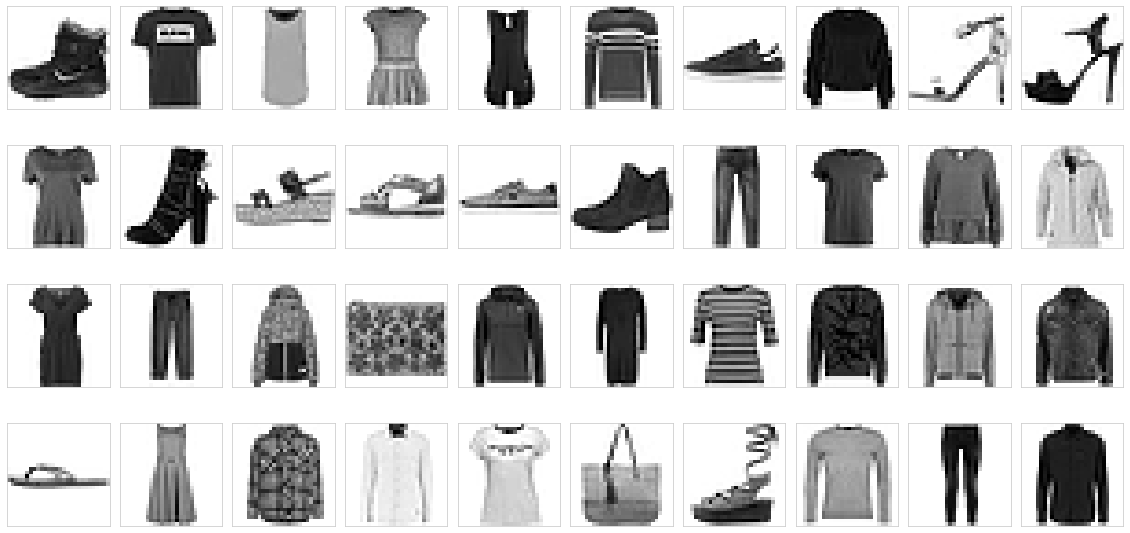

In [ ]:
# This is how the training data looks before adding noise
plot_images_2d(X_train)

Number of components retained: 735


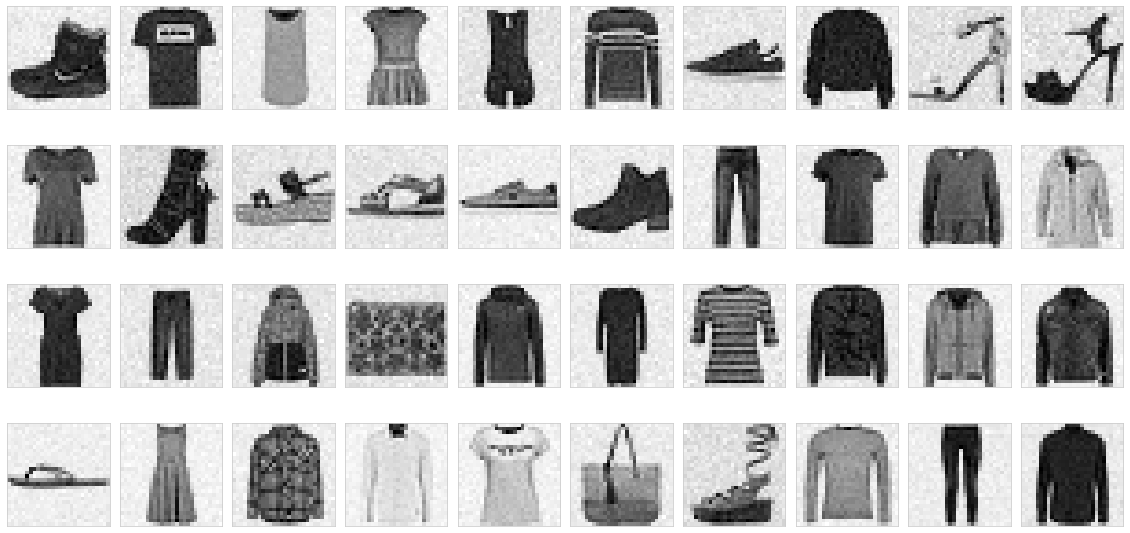

In [ ]:
# #already scale & reshape
np.random.seed(42)
noise = np.random.normal(X_train,2)

pca = PCA(n_components=0.95)
pca.fit(noise)
print('Number of components retained:', pca.n_components_)

X_train_noise = pca.transform(X_train)
X_val_noise = pca.transform(X_val)
# Reconstruct the data with some noise filtered out 
X_train_inverse = pca.inverse_transform(X_train_noise)
X_val_inverse = pca.inverse_transform(X_val_noise)
# #Plot images
plot_images_2d(X_train_inverse)

In [ ]:
X_train_inverse_pca = pipe['pca'].transform(X_train_inverse)
X_val_inverse_pca = pipe['pca'].transform(X_val_inverse)
print("Transformed shape:", X_train_inverse_pca.shape)

Transformed shape: (60000, 187)


In [ ]:
print(X_train_inverse_pca.shape, X_train_inverse_pca.min(), X_train_inverse_pca.max())
print(X_test.shape, X_test.min(), X_test.max())

(60000, 187) -8.022871484557554 10.998500280495504
(40000, 187) -6.83462834664345 9.227596179712645


In [ ]:
best_svc = SVC(C=1)

best_svc.fit(X_train_inverse_pca, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions_2 = best_svc.predict(X_test)
predictions_2

array([8, 3, 9, ..., 8, 3, 6], dtype=uint8)

In [ ]:
result_2 = pd.DataFrame(predictions_2, columns=['Prediction'])
result_2.head(20)

,Prediction
0,8
1,3
2,9
3,5
4,9
5,5
6,8
7,8
8,7
9,0


In [ ]:
best_svc = SVC(C=1)
best_svc.fit(X_train_inverse_pca, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_val.shape, X_val.min(), X_val.max()

((10000, 28, 28), 0, 255)

In [ ]:
predictions = best_svc.predict(X_val_inverse_pca)
val_acc = accuracy_score(y_val, predictions)
val_acc

0.8839

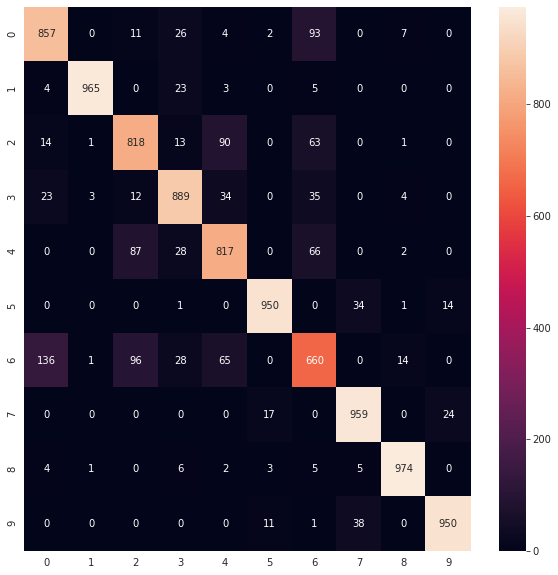

In [ ]:
# MAIN CONF MATRIX
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(data=confusion_matrix(y_val, predictions), annot=True,fmt = ".0f")
plt.show()

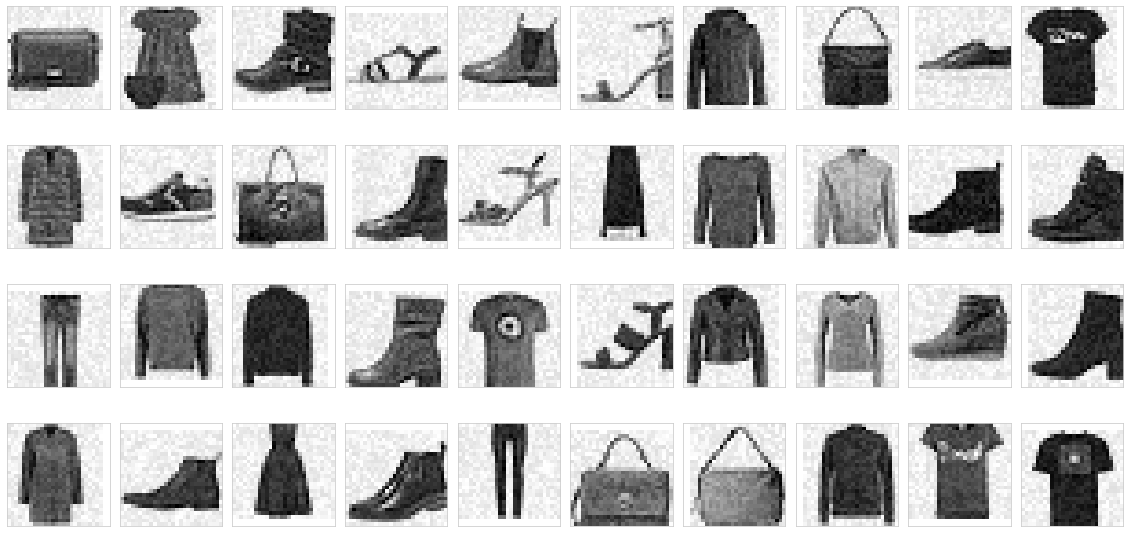

In [ ]:
plot_images_2d(X_test_augmented[:40])

In [ ]:
# Train SVC on the noisy training sample set:
best_svc_3 = SVC(C=10, gamma=0.02)

best_svc_3.fit(X_train_inverse_pca, y_train)

predictions_3 = best_svc_3.predict(X_test)
predictions_3

array([8, 8, 9, ..., 8, 3, 8], dtype=uint8)

In [ ]:
svc3_pred = best_svc_3.predict(X_val_inverse_pca)
print('Accuracy Score:', accuracy_score(y_val, svc3_pred))

Accuracy Score: 0.9028


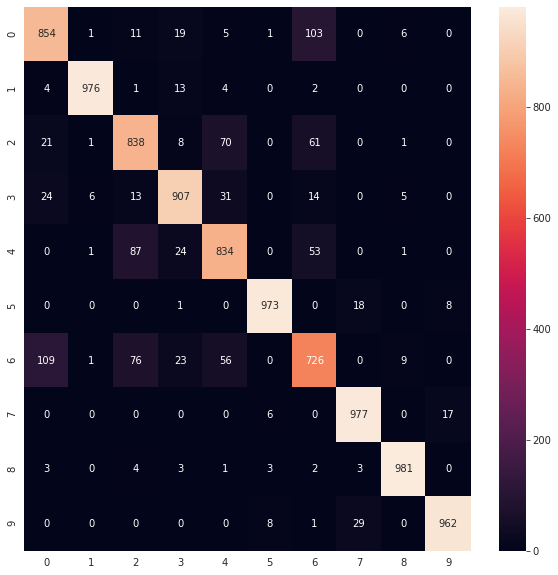

In [ ]:
# Plot the confusion matrix in form of a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=confusion_matrix(y_val, svc3_pred), annot=True,fmt = ".0f")
plt.show()

In [ ]:
best_svc_4 = SVC(C=10)
best_svc_4.fit(X_train_inverse_pca, y_train)
svc4_pred = best_svc_4.predict(X_val_inverse_pca)

In [ ]:
print('Accuracy Score:', accuracy_score(y_val, svc4_pred))

Accuracy Score: 0.9019


In [ ]:
predictions_4 = best_svc_4.predict(X_test)
predictions_4

array([8, 8, 9, ..., 8, 3, 8], dtype=uint8)

In [ ]:
model = SVC(C=10, gamma=0.02)
model.fit(X_train_pca, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred5 = model.predict(X_test)

In [ ]:
svc_pred5

array([8, 8, 9, ..., 8, 3, 8], dtype=uint8)

# Test set

Here is the test set without label (FMNIST_augmented_test.npy). You will use your trained machine learning model to make predictions on this test set, and then submit a csv file containing the predictions 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/MyDrive/FTMLE | 2021.07 | ML30/Week_6.5/Weekly_Project/FMNIST_augmented_test.npy'

In [ ]:
y_test_label = np.load('/content/gdrive/MyDrive/FTMLE | 2021.07 | ML30/Week_6.5/Weekly_Project/FMNIST_augmented_label.npy')

In [ ]:
X_test_augmented = np.load(PATH)

In [ ]:
X_test_augmented.shape

(40000, 28, 28)

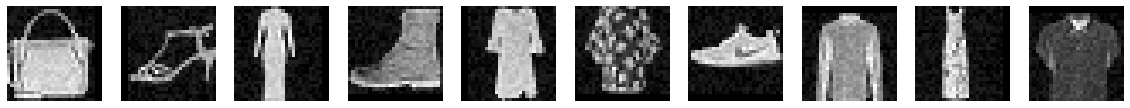

In [ ]:
images = get_samples(10, X_test_augmented)
plot_images_3d(images)

In [ ]:
tmp = pipe['preparation'].transform(X_test_augmented)
tmp

array([[0.0862069 , 0.10344828, 0.03103448, ..., 0.09310345, 0.        ,
        0.        ],
       [0.07931034, 0.12068966, 0.00344828, ..., 0.03448276, 0.        ,
        0.        ],
       [0.03103448, 0.        , 0.05517241, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10689655, ..., 0.1137931 , 0.03448276,
        0.00689655],
       [0.1137931 , 0.08275862, 0.11724138, ..., 0.04827586, 0.        ,
        0.        ],
       [0.04482759, 0.01034483, 0.10344828, ..., 0.06551724, 0.        ,
        0.        ]])

In [ ]:
pca = PCA(n_components=0.95)

tmp = pca.fit_transform(tmp)
tmp_1 = pca.inverse_transform(tmp)

In [ ]:
tmp.shape

(40000, 244)

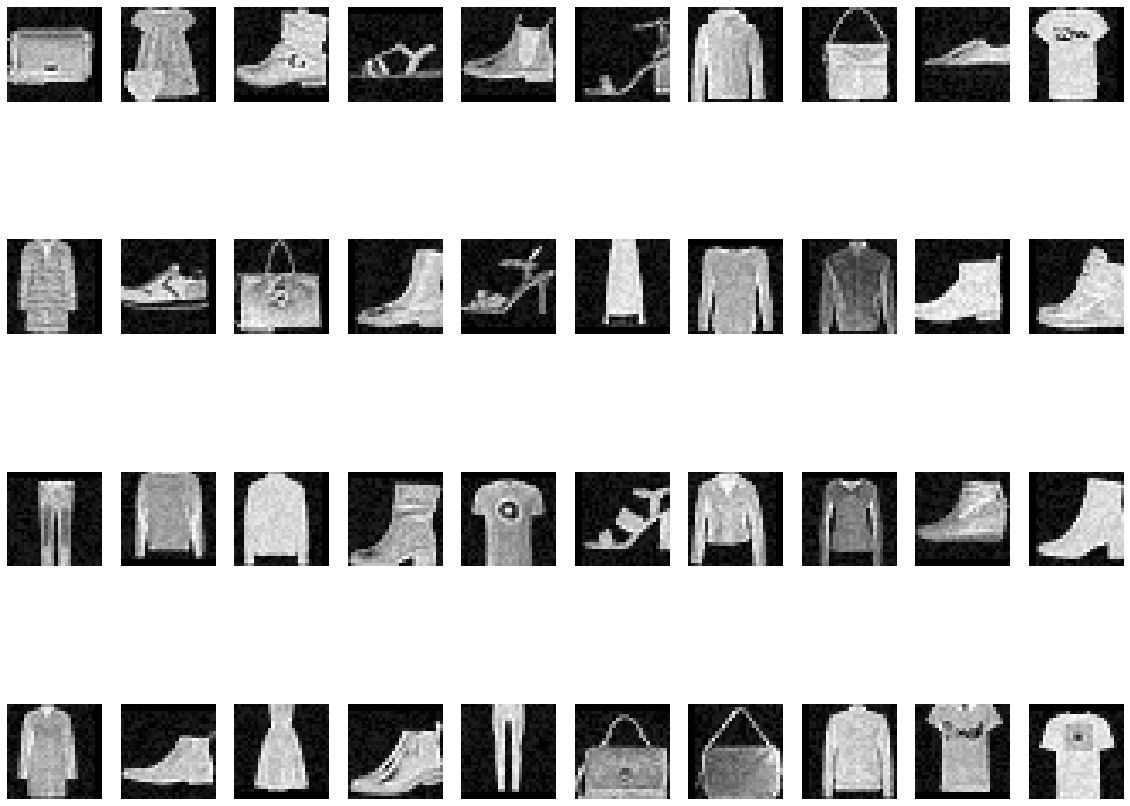

In [ ]:
plot_images_3d(X_test_augmented[:40])

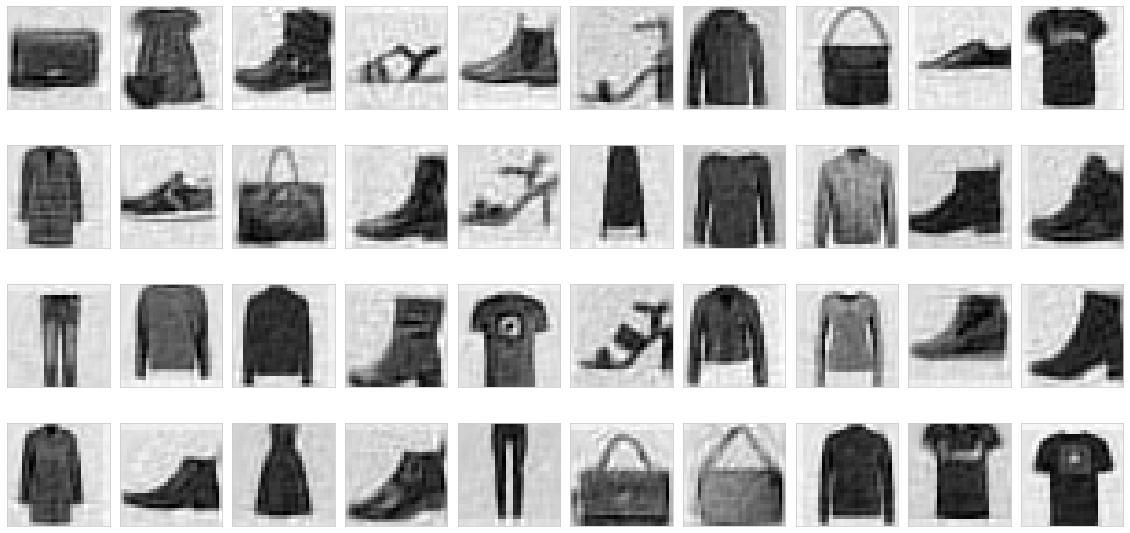

In [ ]:
plot_images_2d(tmp_1[:40])

Note: **pay a close attention to this test set**. 

This test set is slightly different from the train set. In order to improve your model, **make sure you know what the difference is so that you can perform appropriate processings**.

In [ ]:
best_predictions = best_svc.predict(X_val_inverse_pca)

In [ ]:
def plot_images(images, labels=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(100,100))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    if not labels is None:
      ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

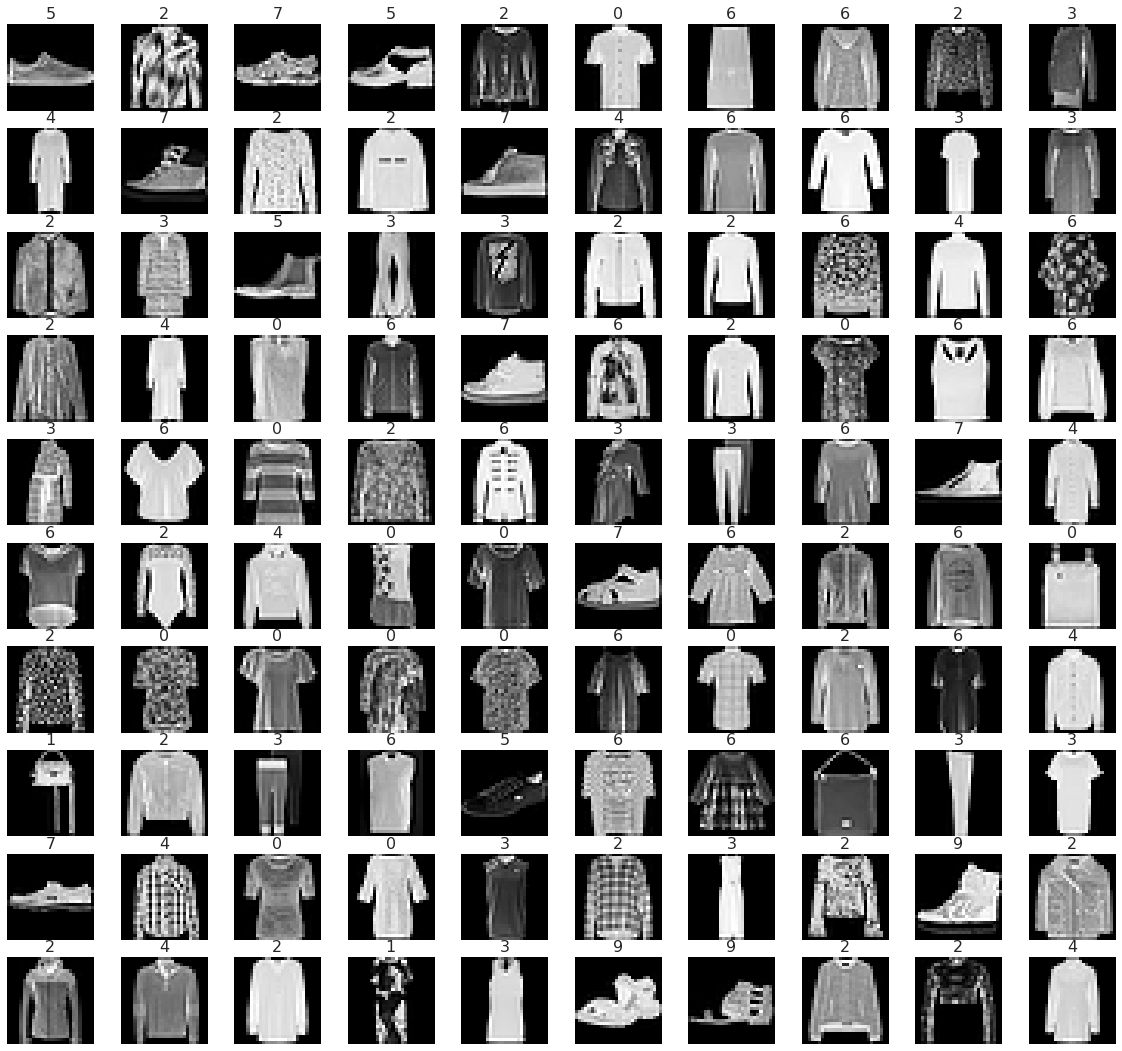

In [ ]:
# Plot the samples that the model predicts incorrectly.
imgs, lbls = X_val[best_predictions!=y_val], best_predictions[best_predictions!=y_val]
imgs = imgs.reshape((imgs.shape[0],28,28))
plot_images_3d(imgs[:100], lbls[:100])

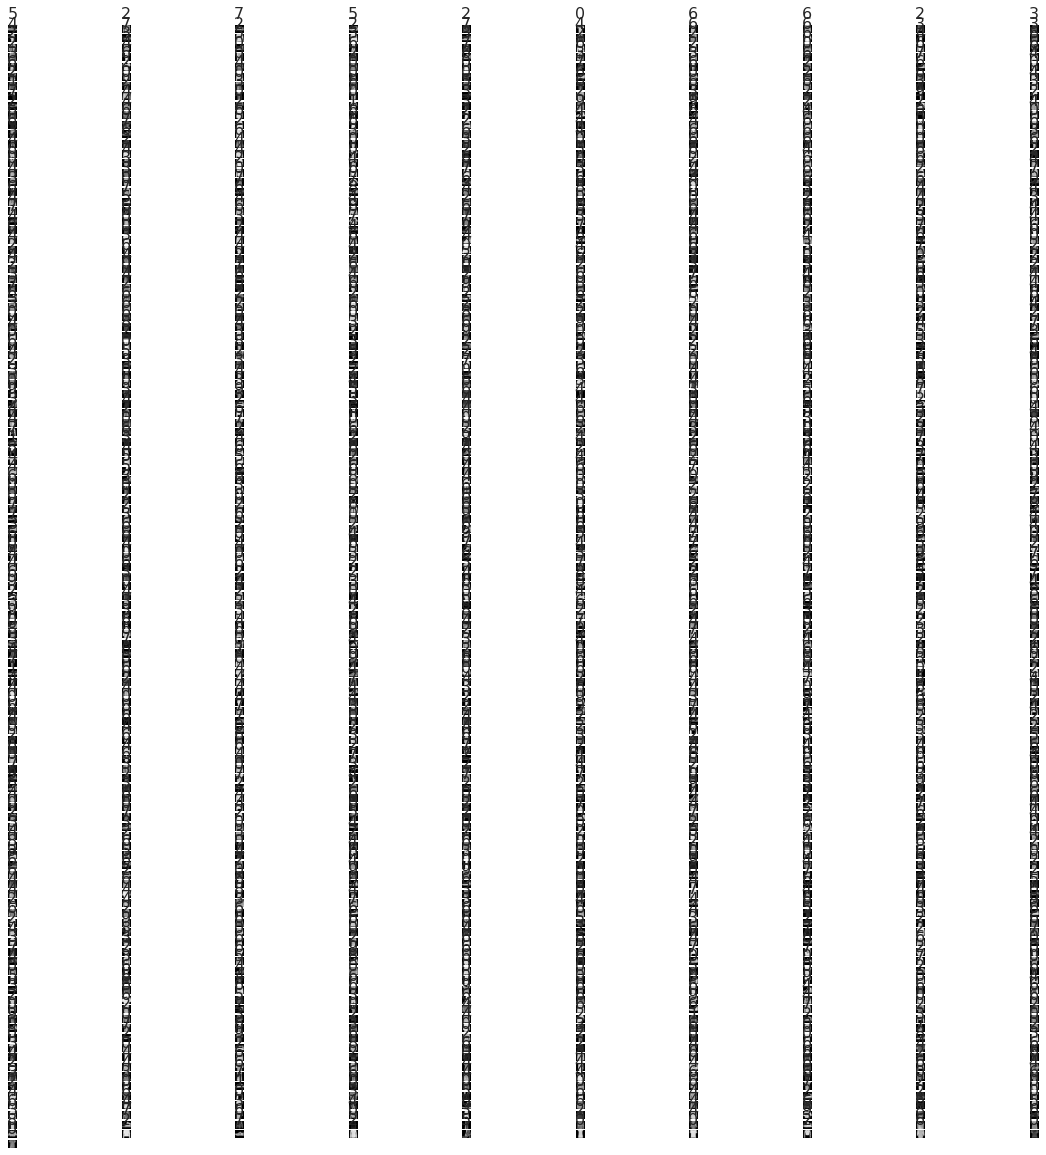

In [ ]:
# Plot the samples that the model predicts incorrectly.
imgs, lbls = X_val[best_predictions!=y_val], best_predictions[best_predictions!=y_val]
imgs = imgs.reshape((imgs.shape[0],28,28))
plot_images_3d(imgs, lbls)

# Submit your predictions as csv file

In [ ]:
# let's make a silly prediction that every image is T-shirt, meaning every prediction is 0
# Here is how you can make such prediction
predictions = np.zeros(shape=[len(X_test_augmented),]).astype(int)

In [ ]:
predictions.shape # make sure that you have 40000 predictions, since the hidden test set has 40000 images

(40000,)

In [ ]:
pred_df = pd.DataFrame(predictions,columns=['pred'])
pred_df.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [ ]:
result_2

,Prediction
0,8
1,3
2,9
3,5
4,9
...,...
39995,6
39996,0
39997,8
39998,3


In [ ]:
submit_path = '/content/gdrive/MyDrive/FTMLE | 2021.07 | ML30/Week_6.5/Weekly_Project/submission'

In [ ]:
MY_NAME= 'THU_LE+QUANG_THI'  # please put your name here in this format: firstname_lastname, e.g. quan_tran

In [ ]:
result_2.to_csv('/content/gdrive/MyDrive/FTMLE | 2021.07 | ML30/Week_6.5/Weekly_Project' + f"/submission/{MY_NAME}_submission.csv", index=None)

By running the cell above, you actually submit your predictions directly to the submissions folder in Weekly_Project folder, as I have granted you permission to save files there. Let me know if you have any problem running the cell above.



Good luck!